# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = pd.read_csv("C:/Users/DanMona/Desktop/SMU_Homework/SMU Assignments/Unit_06_Python_APIs/output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

cities

['vila franca do campo',
 'bredasdorp',
 'codrington',
 'sao joao da barra',
 'roebourne',
 'castro',
 'rikitea',
 'pacific grove',
 'itarema',
 'ostrovnoy',
 'fuling',
 'ballina',
 'lavrentiya',
 'saskylakh',
 'vikhorevka',
 'hermanus',
 'illoqqortoormiut',
 'hilo',
 'sungaipenuh',
 'port alfred',
 'manoel urbano',
 'nikolskoye',
 'dingle',
 'erdenet',
 'sahuaripa',
 'vardo',
 'muzhi',
 'kapaa',
 'ancud',
 'albany',
 'enshi',
 'butaritari',
 'punta arenas',
 'portland',
 'vaini',
 'chokurdakh',
 'kuytun',
 'karrapur',
 'hofn',
 'taolanaro',
 'san patricio',
 'conde',
 'mataura',
 'lorengau',
 'mahebourg',
 'ushuaia',
 'kavieng',
 'chimbote',
 'qaqortoq',
 'sao paulo de olivenca',
 'bonfim',
 'kyzyl-suu',
 'busselton',
 'kailua',
 'port elizabeth',
 'raga',
 'katsuura',
 'kokstad',
 'terrace',
 'coquimbo',
 'aqtobe',
 'abis',
 'san roque',
 'cherskiy',
 'chapais',
 'ji-parana',
 'saldanha',
 'phalodi',
 'atuona',
 'haines junction',
 'lebu',
 'kaitangata',
 'sao miguel do araguaia',
 '

In [5]:
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
lat_val = []
long_val = []
humidy = []
clouds = []
windy = []
temp = []
max_temp = []
min_temp = []
pressure = []
city_list = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
       
    try:
        response = requests.get(url).json()
        code = response['cod']
                            
        if code == 200:
            city_list.append(city)
            lat_val.append(response['coord']['lat'])
            long_val.append(response['coord']['lon'])
            pressure.append(response['main']['pressure'])            
            humidy.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            temp.append(response['main']['temp'])
            max_temp.append(response['main']['temp_max'])
            min_temp.append(response['main']['temp_min'])
            windy.append(response['wind']['speed'])                       
    except Exception as e:    
        print(e)
time.sleep(1)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

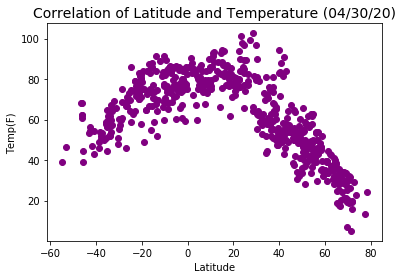

In [80]:
plt.scatter(lat_val,temp,color='purple')
plt.title('Correlation of Latitude and Temperature (04/30/20)',fontsize=14)
plt.xlabel('Latitude')
plt.ylabel("Temp(F)")
plt.show()

The relation between latitude and temperature is parabolic. As you approach the Earth's equator (Lat. 0), we can expect the average temperature to be high.

## Latitude vs. Humidity Plot

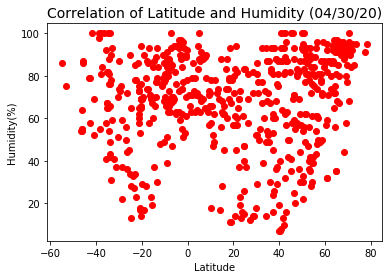

In [81]:
plt.scatter(lat_val,humidy,color='r')
plt.title('Correlation of Latitude and Humidity (04/30/20)',fontsize=14)
plt.xlabel('Latitude')
plt.ylabel("Humidity(%)")
plt.show()

There is little to no relation between humidity and latitude.

## Latitude vs. Cloudiness Plot

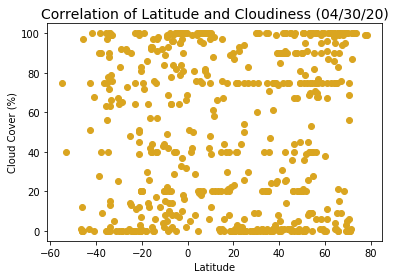

In [82]:
plt.scatter(lat_val,clouds,color='goldenrod')
plt.title('Correlation of Latitude and Cloudiness (04/30/20)',fontsize=14)
plt.xlabel('Latitude')
plt.ylabel("Cloud Cover (%)")
plt.show()

There is no relation between latitude and cloud cover.

## Latitude vs. Wind Speed Plot

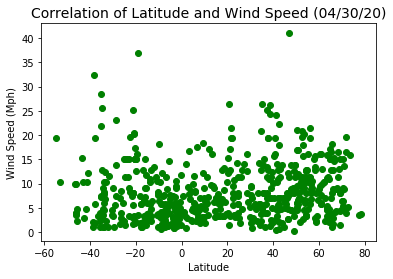

In [83]:
plt.scatter(lat_val,windy, color='green')
plt.title('Correlation of Latitude and Wind Speed (04/30/20)',fontsize=14)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (Mph)")
plt.show()

There is no relation between latitude and wind speed.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [119]:
select_City_df = pd.DataFrame({'City': city_list,'Latitude': lat_val,'Longitude': long_val,'Humidity': humidy, 'Pressure':pressure,
             'Wind Speed (Mph)': windy,'Cloud Cover (%)': clouds,'Temperature (F)': temp})

select_City_df


,City,Latitude,Longitude,Humidity,Pressure,Wind Speed (Mph),Cloud Cover (%),Temperature (F)
0,vila franca do campo,37.72,-25.43,93,1015,19.46,75,64.40
1,bredasdorp,-34.53,20.04,81,1020,4.70,72,51.80
2,codrington,-38.27,141.97,55,1002,32.37,100,53.67
3,sao joao da barra,-21.64,-41.05,86,1017,7.45,100,71.76
4,roebourne,-20.78,117.13,18,1016,20.45,0,81.39
...,...,...,...,...,...,...,...,...
569,carauari,-4.88,-66.90,94,1014,1.50,100,74.48
570,matara,5.95,80.54,68,1012,8.46,18,87.17
571,victoria,22.29,114.16,69,1010,8.01,91,79.52
572,polunochnoye,60.87,60.42,82,1008,5.79,91,34.61


In [121]:
select_City_df.to_csv('Sorted_Cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [122]:
humid_mask = select_City_df.Humidity > 100

No cities listed have humidity above 100%. Determined by examining exported CSV file in excel and sorting values.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [123]:
# Create Northern and Southern Hemisphere DataFrames
north_Lat = select_City_df.Latitude >= 0
north_Hemi = select_City_df.loc[north_Lat]
north_Hemi

,City,Latitude,Longitude,Humidity,Pressure,Wind Speed (Mph),Cloud Cover (%),Temperature (F)
0,vila franca do campo,37.72,-25.43,93,1015,19.46,75,64.40
7,pacific grove,36.62,-121.92,83,1019,4.00,24,54.86
9,ostrovnoy,68.05,39.51,96,1015,9.13,99,28.83
10,fuling,29.70,107.39,52,1011,3.09,100,79.43
12,lavrentiya,65.58,-171.00,94,1010,3.65,0,28.15
...,...,...,...,...,...,...,...,...
566,klichka,50.45,118.00,22,998,21.00,0,65.46
570,matara,5.95,80.54,68,1012,8.46,18,87.17
571,victoria,22.29,114.16,69,1010,8.01,91,79.52
572,polunochnoye,60.87,60.42,82,1008,5.79,91,34.61


In [124]:
south_Lat = select_City_df.Latitude <= 0
south_Hemi = select_City_df.loc[south_Lat]
south_Hemi

,City,Latitude,Longitude,Humidity,Pressure,Wind Speed (Mph),Cloud Cover (%),Temperature (F)
1,bredasdorp,-34.53,20.04,81,1020,4.70,72,51.80
2,codrington,-38.27,141.97,55,1002,32.37,100,53.67
3,sao joao da barra,-21.64,-41.05,86,1017,7.45,100,71.76
4,roebourne,-20.78,117.13,18,1016,20.45,0,81.39
5,castro,-24.79,-50.01,65,1019,1.41,13,58.87
...,...,...,...,...,...,...,...,...
562,coolum beach,-26.53,153.10,36,1007,3.00,73,71.04
563,coihaique,-45.58,-72.07,86,1025,4.70,97,39.20
567,kwinana,-32.25,115.77,41,1026,1.01,5,69.03
568,diamantino,-14.41,-56.45,66,1016,3.96,6,70.38


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is:-0.8758941529653557


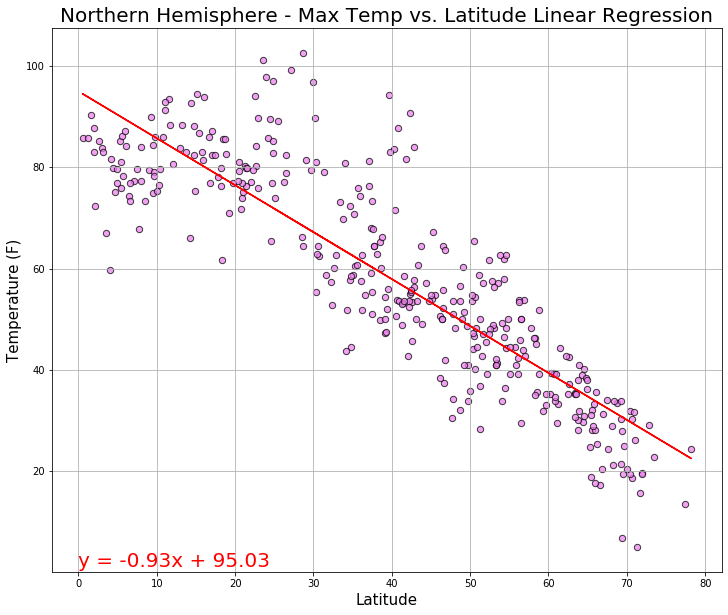

In [145]:
(slope, intercept, r_value, p_value, std_err) = linregress(north_Hemi['Latitude'], north_Hemi['Temperature (F)'])
regress_values = north_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(north_Hemi['Latitude'],north_Hemi['Temperature (F)'],marker="o", facecolors="violet", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(north_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Temperature (F)",fontsize=15)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is:0.7033652975674083


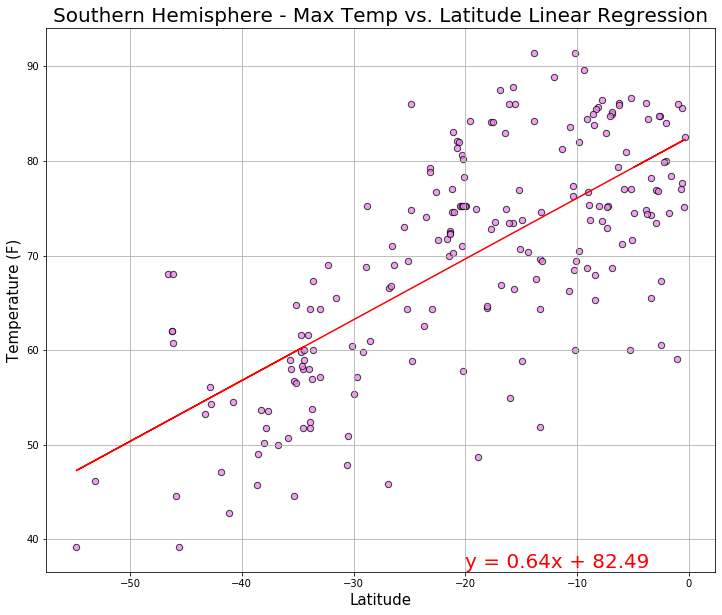

In [146]:
(slope, intercept, r_value, p_value, std_err) = linregress(south_Hemi['Latitude'], south_Hemi['Temperature (F)'])
regress_values = south_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(south_Hemi['Latitude'],south_Hemi['Temperature (F)'],marker="o", facecolors="violet", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(south_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-20,37),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Temperature (F)",fontsize=15)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is:0.20146097932805998


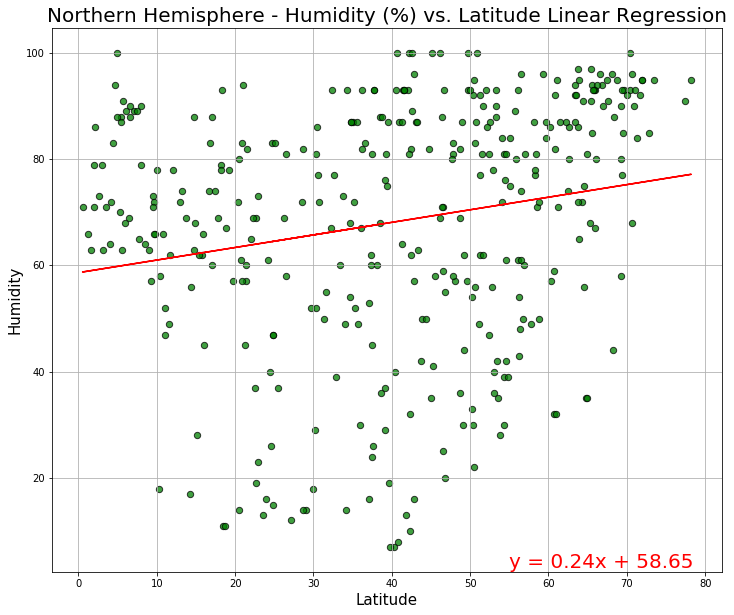

In [147]:
(slope, intercept, r_value, p_value, std_err) = linregress(north_Hemi['Latitude'], north_Hemi['Humidity'])
regress_values = north_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(north_Hemi['Latitude'],north_Hemi['Humidity'],marker="o", facecolors="green", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(north_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(55,3),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Humidity",fontsize=15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is:0.13847304165150986


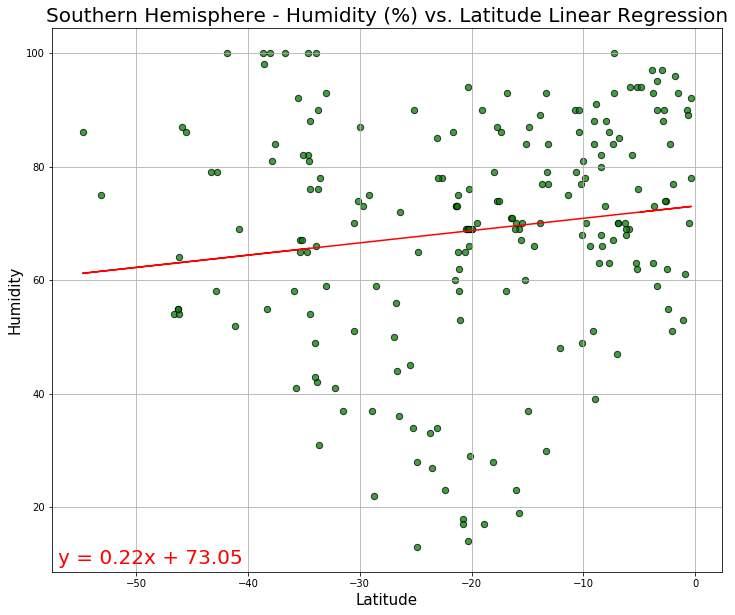

In [148]:
(slope, intercept, r_value, p_value, std_err) = linregress(south_Hemi['Latitude'], south_Hemi['Humidity'])
regress_values = south_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(south_Hemi['Latitude'],south_Hemi['Humidity'],marker="o", facecolors="green", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(south_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-57,10),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Humidity",fontsize=15)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is:0.13033505375354146


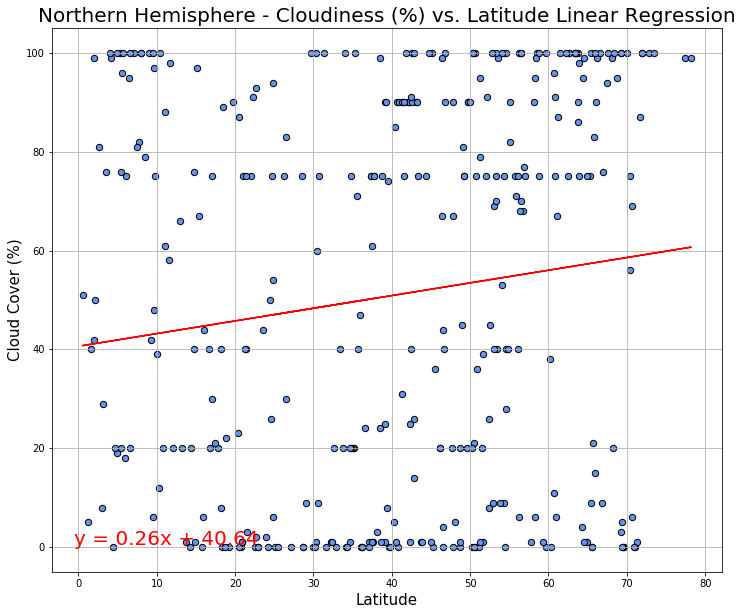

In [149]:
(slope, intercept, r_value, p_value, std_err) = linregress(north_Hemi['Latitude'], north_Hemi['Cloud Cover (%)'])
regress_values = north_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(north_Hemi['Latitude'],north_Hemi['Cloud Cover (%)'],marker="o", facecolors="cornflowerblue", edgecolors="black",s=40,
             alpha=1)
plt.plot(north_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-.5,.5),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Cloud Cover (%)",fontsize=15)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is:0.10872712534256514


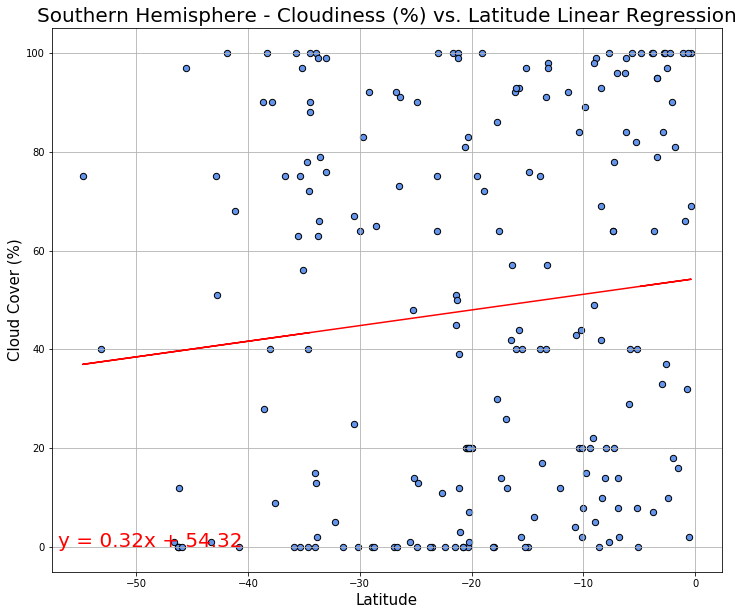

In [150]:
(slope, intercept, r_value, p_value, std_err) = linregress(south_Hemi['Latitude'], south_Hemi['Cloud Cover (%)'])
regress_values = south_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(south_Hemi['Latitude'],south_Hemi['Cloud Cover (%)'],marker="o", facecolors="cornflowerblue", edgecolors="black",s=40,
             alpha=1)
plt.plot(south_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-57,0),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Cloud Cover (%)",fontsize=15)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is:0.12641917421319718


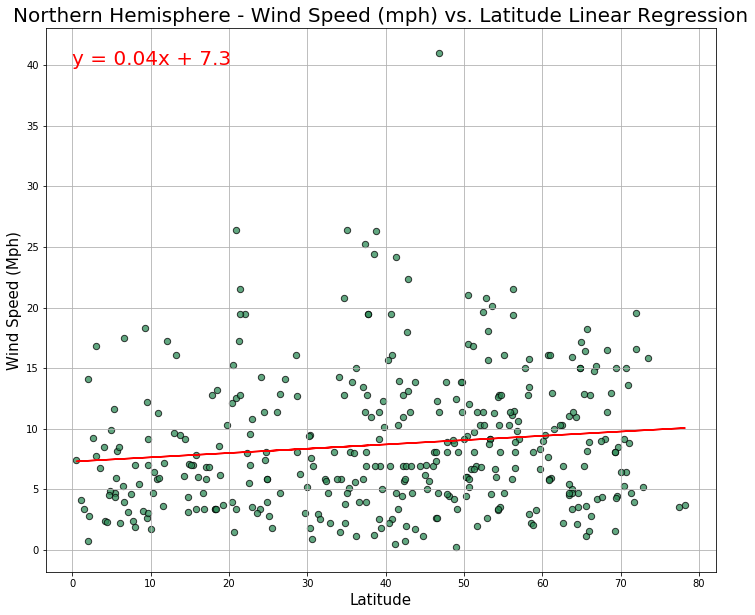

In [144]:
(slope, intercept, r_value, p_value, std_err) = linregress(north_Hemi['Latitude'], north_Hemi['Wind Speed (Mph)'])
regress_values = north_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(north_Hemi['Latitude'],north_Hemi['Wind Speed (Mph)'],marker="o", facecolors="seagreen", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(north_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Wind Speed (Mph)",fontsize=15)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is:-0.21396797312159502


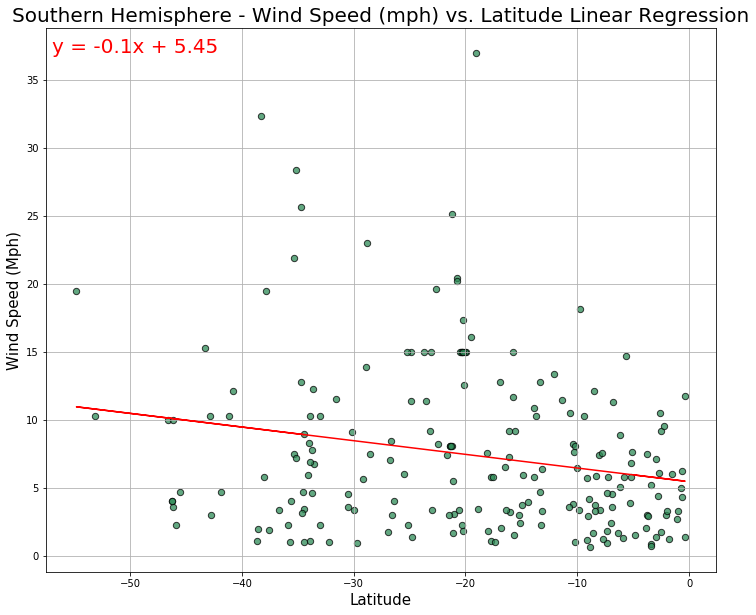

In [151]:
(slope, intercept, r_value, p_value, std_err) = linregress(south_Hemi['Latitude'], south_Hemi['Wind Speed (Mph)'])
regress_values = south_Hemi['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,10))
plt.scatter(south_Hemi['Latitude'],south_Hemi['Wind Speed (Mph)'],marker="o", facecolors="seagreen", edgecolors="black",s=40,
             alpha=0.75)
plt.plot(south_Hemi['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-57,37),fontsize=20,color="red")

plt.xlabel("Latitude",fontsize=15)
plt.ylabel("Wind Speed (Mph)",fontsize=15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",fontsize=20)
plt.grid(True)
print(f'The r-squared value is:{r_value}')
plt.show()